In [109]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb

In [110]:
titanic_data=sb.load_dataset('titanic')

In [111]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [112]:
titanic_data.shape

(891, 15)

In [113]:
#making a copy of original dataset
titanic=titanic_data.copy()

In [114]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [115]:
#dropping absolutely irrelevant columns like class since pclass is already present
titanic.drop(['class','survived','alone','embark_town','who','alone'],axis=1,inplace=True)

In [116]:
titanic.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alive
0,3,male,22.0,1,0,7.2500,S,True,NaN,no
1,1,female,38.0,1,0,71.2833,C,False,C,yes
2,3,female,26.0,0,0,7.9250,S,False,NaN,yes
3,1,female,35.0,1,0,53.1000,S,False,C,yes
4,3,male,35.0,0,0,8.0500,S,True,NaN,no


In [117]:
#viewing null values
titanic.isna().sum()

pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
adult_male      0
deck          688
alive           0
dtype: int64

In [118]:
titanic['embarked'].mode()

0    S
dtype: object

In [119]:
titanic['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]

In [120]:
#handling missing values
titanic['age'].replace(np.NaN,titanic['age'].mean(),inplace=True)
titanic['embarked'].fillna('S',inplace=True)
titanic['deck'].fillna('C',inplace=True)

In [121]:
#checking for nan values
titanic.isna().sum()

pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
deck          0
alive         0
dtype: int64

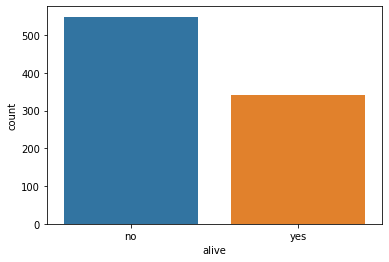

In [122]:
#more number of people died than alive
sb.countplot(x='alive',data=titanic)

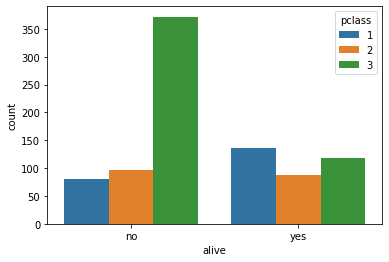

In [123]:
# people who were in class 3 died more than those who were in 1 and 2
sb.countplot(x='alive',hue='pclass',data=titanic)

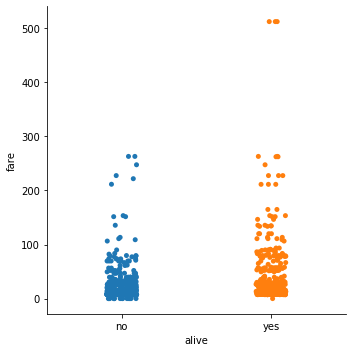

In [124]:
# people who paid more were survived more than who paid less
sb.catplot(x='alive',y='fare',data=titanic)

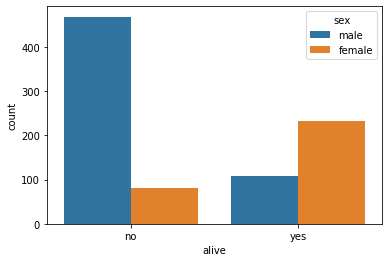

In [125]:
#more female survived than male
sb.countplot(x='alive',hue='sex',data=titanic)

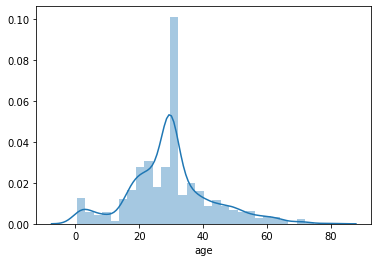

In [126]:
#maximum people were of age 20 to 40
sb.distplot(titanic['age'])

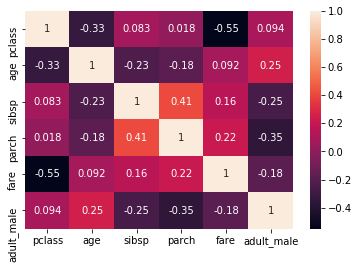

In [127]:
sb.heatmap(titanic.corr(),annot=True)

In [128]:
import sklearn
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in ['sex','embarked','alive','deck','adult_male']:
    titanic[i]=lb.fit_transform(titanic[i])


In [129]:
titanic.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alive
0,3,1,22.0,1,0,7.2500,2,1,2,0
1,1,0,38.0,1,0,71.2833,0,0,2,1
2,3,0,26.0,0,0,7.9250,2,0,2,1
3,1,0,35.0,1,0,53.1000,2,0,2,1
4,3,1,35.0,0,0,8.0500,2,1,2,0


In [130]:
#import libraries for various models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [131]:
# preparing a function to find best random state for accuracy
def classification(dataset,test_size,model):
    max=0
    ind=0
    x=dataset.iloc[:,0:-1]
    y=dataset.iloc[:,-1]
    for i in range(100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < accuracy_score(test_y,pred)):
                max=accuracy_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('score :',model.score(train_x,train_y))
    print('Accuracy score :\n',accuracy_score(test_y,pred))
    print('Best accuracy at Random state :',ind)
    print('\nConfusion Matrix :\n',confusion_matrix(test_y,pred))
    print('\nclassification_report :\n',classification_report(test_y,pred))

In [132]:
#finding the best model which is giving highest accuracy among all
model_list=[LogisticRegression(),DecisionTreeClassifier(criterion='gini'),DecisionTreeClassifier(criterion='entropy'),
            SVC(kernel='rbf'),SVC(kernel='poly'),KNeighborsClassifier(),MultinomialNB()]
for i in model_list:
    print('\nResult for model :',i)
    classification(titanic,0.3,i)


Result for model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score : 0.8186195826645265
Accuracy score :
 0.8694029850746269
Best accuracy at Random state : 11

Confusion Matrix :
 [[162  14]
 [ 21  71]]

classification_report :
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       176
           1       0.84      0.77      0.80        92

    accuracy                           0.87       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.87      0.87      0.87       268


Result for model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_l

In [1]:
#We can see that best accuracy is give by logistic regression at random state 11


In [134]:
x=titanic.iloc[:,0:-1]
y=titanic.iloc[:,-1]
model=LogisticRegression()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=11)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('score :',model.score(train_x,train_y))
print('Accuracy score :\n',accuracy_score(test_y,pred))
print('\nConfusion Matrix :\n',confusion_matrix(test_y,pred))
print('\nclassification_report :\n',classification_report(test_y,pred))

score : 0.8186195826645265
Accuracy score :
 0.8694029850746269

Confusion Matrix :
 [[162  14]
 [ 21  71]]

classification_report :
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       176
           1       0.84      0.77      0.80        92

    accuracy                           0.87       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.87      0.87      0.87       268



In [135]:
# computing cross validation score to check over and underfitting
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(),x,y,cv=10,scoring="accuracy")
print('cross validation score :',scores, scores.mean())

cross validation score : [0.78888889 0.86516854 0.76404494 0.83146067 0.83146067 0.78651685
 0.80898876 0.80898876 0.83146067 0.87640449] 0.8193383270911362


In [136]:
#cross val score is 81 which is close to the model accuracy(i.e 86) so model is performing well

In [137]:
#using serialization
from sklearn.externals import joblib
joblib.dump(model,'titanic_model.obj')

['titanic_model.obj']